# Principal Component Analysis (PCA)

El análisis de componentes principales permite reducir las dimensiones de las muestras originales creando nuevas componentes que concentren la varianza del conjunto de datos original. Si elimináramos características al azar, perderíamos información. Esto sucede casi siempre que eliminamos características de nuestro conjunto de datos pero la idea de concentrar la varianza en componentes concretas hace que suprimir las componentes menos informativas reduzca la cantidad de información perdida con respecto al ruido que también aportan las mismas variables, destilando así nuestro conjunto de datos original.

La coravianza entre dos variables (atributos de nuestras muestras o columnas de nuestro dataframe) se define como:

$$

Cov(X, Y) = E[(X - E[X])(Y - E[Y])]

$$
donde $n$ representa el numero total de datos. De modo que la matriz de covarianza muestra los valores asociados a cada par de muestras en una matriz de $n \times n$ donde $Cov(x_i, x_i) = Var(X_i) = \sigma_{X_i}^2$. Esta matriz caracteriza la variabilidad de nuestro conjunto de datos, de manera que encontrando su autovector de mayor autovalor podemos condensar en una única combinación lineal de los atributos su máximo contenido informativo. Los autovalores y autovectores son claves a la hora de descomponer una matriz. Cumplen la relación

$$

Av = \lambda v

$$
siendo $\lambda$ un valor scalar y $v$ un vector, de manera que caracterizan de forma particular la variabilidad de nuestras muestras de datos. Os dejamos algo más de información en [este enlace](https://aga.frba.utn.edu.ar/autovalores-autovectores-definiciones-propiedades/).

Dado que no es trivial familiarizarse con la descomposición de matrices, veamos un ejemplo práctico.

In [1]:
import statsmodels.api as sm

# Dataset
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [3]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [4]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [5]:
datos.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales

In [6]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(PCA(n_components=4))
pca_pipe.fit(datos)

modelo_pca = pca_pipe['pca']
modelo_pca

PCA(n_components=4)

In [7]:
import pandas as pd

# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data = modelo_pca.components_,
    columns = datos.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.041704,0.995221,0.046336,0.075156
PC2,0.044822,0.058760,-0.976857,-0.200718
PC3,0.079891,-0.067570,-0.200546,0.974081
PC4,0.994922,-0.038938,0.058169,-0.072325


In [8]:
modelo_pca.explained_variance_

array([7.01111485e+03, 2.01992366e+02, 4.21126508e+01, 6.16424618e+00])

Podemos comprobar cómo el resultado del PCA coincide con la forma en la que los autovectores caracterizan la matriz.

In [9]:
from numpy.linalg import eig

# Perform PCA
evals, evectors = eig(datos.cov())
evectors.T

array([[ 0.04170432,  0.99522128,  0.04633575,  0.0751555 ],
       [ 0.04482166,  0.05876003, -0.97685748, -0.20071807],
       [-0.99492173,  0.0389383 , -0.05816914,  0.07232502],
       [ 0.07989066, -0.06756974, -0.20054629,  0.97408059]])

Y también cómo el primer vector caracteriza primordialmente la variabilidad, donde **Assault** debido a su escala predomina al resto.

In [10]:
evals

array([7.01111485e+03, 2.01992366e+02, 6.16424618e+00, 4.21126508e+01])

In [11]:
from sklearn.preprocessing import StandardScaler

pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=4))
pca_pipe.fit(datos)

modelo_pca = pca_pipe['pca']

# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data = modelo_pca.components_,
    columns = datos.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [12]:
modelo_pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [13]:
modelo_pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

Analizar con detalle el vector de loadings que forma cada componente puede ayudar a interpretar qué tipo de información recoge cada una de ellas. Por ejemplo, la primera componente es el resultado de la siguiente combinación lineal de las variables originales:

$$
y = a + bx_1 + cx_2 ...
$$

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

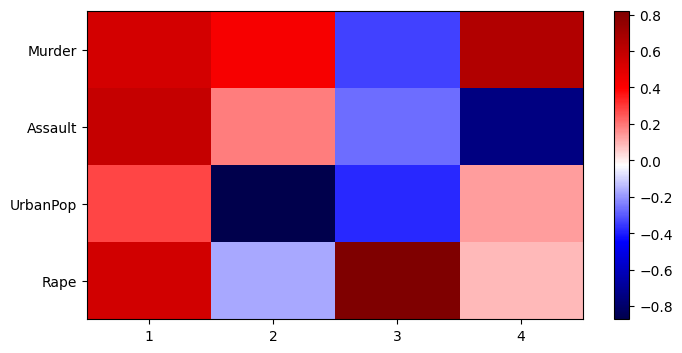

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Heatmap componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

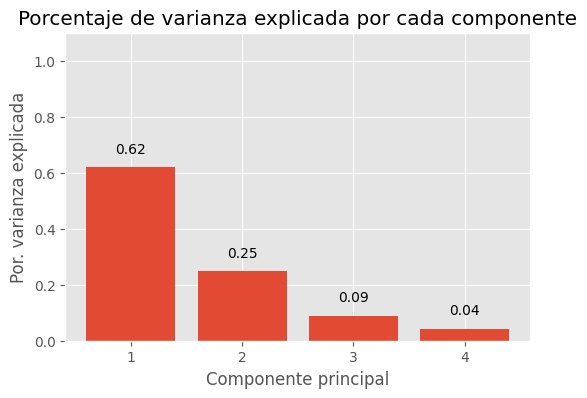

In [15]:
# Porcentaje de varianza explicada por cada componente
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

Podemos ver con la suma acumulativa que finalmente, las cuatro componentes, suman el total de la varianza a explicar (1.0).

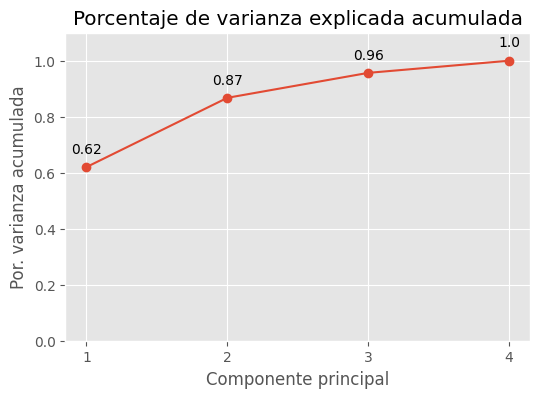

In [16]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada. Esto permite disponer de modelos más pequeños, basados en unicamente dos componentes, y facilitar su entrenamiento gracias a la supresión de ruido.

Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [17]:
# Proyección de las observaciones de entrenamiento
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
modelo_pca = pca_pipe['pca']
proyecciones = pca_pipe.fit_transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2
rownames,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [18]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2
rownames,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [19]:
# Reconstrucción de las proyecciones
# ==============================================================================
reconstruccion = pca_pipe.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(
    reconstruccion,
    columns = datos.columns,
    index = datos.index
)

print('------------------')
print('Valores reconstruidos')
print('------------------')
display(reconstruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(datos.head())

------------------
Valores reconstruidos
------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,12.108907,235.755815,55.293753,24.439738
Alaska,14.229193,281.230658,59.891444,29.393422
Arizona,10.517042,244.021633,81.897906,31.273586
Arkansas,9.480315,181.322623,50.971310,18.782131
California,10.838010,268.266387,94.898277,36.343663


---------------------
Valores originales
---------------------


,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Referencias:

* Guía paso a paso en inglés: https://compneuro.neuromatch.io/tutorials/W1D4_DimensionalityReduction/student/W1D4_Tutorial3.html